In [71]:
import csv,json
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [72]:
time = np.loadtxt("time.csv", dtype=np.float32)

In [73]:
BS1 = np.loadtxt("baseline1.csv", dtype=np.float32)
BS2 = np.loadtxt("baseline2.csv", dtype=np.float32)
BS3 = np.loadtxt("baseline3.csv", dtype=np.float32)

In [74]:
T51 = np.loadtxt("t51.csv", dtype=np.float32)
T52 = np.loadtxt("t52.csv", dtype=np.float32)
T53 = np.loadtxt("t53.csv", dtype=np.float32)

In [75]:
T101 = np.loadtxt("t101.csv", dtype=np.float32)
T102 = np.loadtxt("t102.csv", dtype=np.float32)
T103 = np.loadtxt("t103.csv", dtype=np.float32)

In [76]:
T151 = np.loadtxt("t151.csv", dtype=np.float32)
T152 = np.loadtxt("t152.csv", dtype=np.float32)
T153 = np.loadtxt("t153.csv", dtype=np.float32)

In [77]:
T201 = np.loadtxt("t201.csv", dtype=np.float32)
T202 = np.loadtxt("t202.csv", dtype=np.float32)
T203 = np.loadtxt("t203.csv", dtype=np.float32)

In [78]:
T251 = np.loadtxt("t251.csv", dtype=np.float32)
T252 = np.loadtxt("t252.csv", dtype=np.float32)
T253 = np.loadtxt("t253.csv", dtype=np.float32)

In [99]:
ho = 65
Bn = 1
Fn = 212;

In [100]:
bs1 = BS1[Bn:Fn]
bs2 = BS2[Bn:Fn]
bs3 = BS3[Bn:Fn]

ts51 = T51[Bn:Fn]
ts52 = T52[Bn:Fn]
ts53 = T53[Bn:Fn]

ts101 = T101[Bn:Fn]
ts102 = T102[Bn:Fn]
ts103 = T103[Bn:Fn]

ts151 = T151[Bn:Fn]
ts152 = T152[Bn:Fn]
ts153 = T153[Bn:Fn]

ts201 = T201[Bn:Fn]
ts202 = T202[Bn:Fn]
ts203 = T203[Bn:Fn]

ts251 = T251[Bn:Fn]
ts252 = T252[Bn:Fn]
ts253 = T253[Bn:Fn]

mbs1 = np.convolve(bs1, np.ones(ho), 'valid') / ho
mbs2 = np.convolve(bs2, np.ones(ho), 'valid') / ho
mbs3 = np.convolve(bs3, np.ones(ho), 'valid') / ho

mts51 = np.convolve(ts51, np.ones(ho), 'valid') / ho
mts52 = np.convolve(ts52, np.ones(ho), 'valid') / ho
mts53 = np.convolve(ts53, np.ones(ho), 'valid') / ho

mts101 = np.convolve(ts101, np.ones(ho), 'valid') / ho
mts102 = np.convolve(ts102, np.ones(ho), 'valid') / ho
mts103 = np.convolve(ts103, np.ones(ho), 'valid') / ho

mts151 = np.convolve(ts151, np.ones(ho), 'valid') / ho
mts152 = np.convolve(ts152, np.ones(ho), 'valid') / ho
mts153 = np.convolve(ts153, np.ones(ho), 'valid') / ho

mts201 = np.convolve(ts201, np.ones(ho), 'valid') / ho
mts202 = np.convolve(ts202, np.ones(ho), 'valid') / ho
mts203 = np.convolve(ts203, np.ones(ho), 'valid') / ho

mts251 = np.convolve(ts251, np.ones(ho), 'valid') / ho
mts252 = np.convolve(ts252, np.ones(ho), 'valid') / ho
mts253 = np.convolve(ts253, np.ones(ho), 'valid') / ho

TL1 = np.vstack([mbs1, mbs2, mbs3])
TL2 = np.vstack([mts101, mts102, mts103])
TL3 = np.vstack([mts51, mts52, mts53])
TL4 = np.vstack([mts151, mts152, mts153])
TL5 = np.vstack([mts201, mts202, mts203])
TL6 = np.vstack([mts251, mts252, mts253])

In [101]:
etCI1 = st.t.interval(alpha=0.95, df=2, loc=TL1.mean(0), scale=st.sem(TL1))
etCI2 = st.t.interval(alpha=0.95, df=2, loc=TL2.mean(0), scale=st.sem(TL2))
etCI3 = st.t.interval(alpha=0.95, df=2, loc=TL3.mean(0), scale=st.sem(TL3))
etCI4 = st.t.interval(alpha=0.95, df=2, loc=TL4.mean(0), scale=st.sem(TL4))
etCI5 = st.t.interval(alpha=0.95, df=2, loc=TL5.mean(0), scale=st.sem(TL5))
etCI6 = st.t.interval(alpha=0.95, df=2, loc=TL6.mean(0), scale=st.sem(TL6))

In [102]:
etLo1 = np.array(etCI1)[0,:]
etUp1 = np.array(etCI1)[1,:]
etMe1 = TL1.mean(0)

etLo2 = np.array(etCI2)[0,:]
etUp2 = np.array(etCI2)[1,:]
etMe2 = TL2.mean(0)

etLo3 = np.array(etCI3)[0,:]
etUp3 = np.array(etCI3)[1,:]
etMe3 = TL3.mean(0)

etLo4 = np.array(etCI4)[0,:]
etUp4 = np.array(etCI4)[1,:]
etMe4 = TL4.mean(0)

etLo5 = np.array(etCI5)[0,:]
etUp5 = np.array(etCI5)[1,:]
etMe5 = TL5.mean(0)

etLo6 = np.array(etCI6)[0,:]
etUp6 = np.array(etCI6)[1,:]
etMe6 = TL6.mean(0)

In [103]:
t = np.arange(len(etMe1))*1000000/len(etMe1) + 1

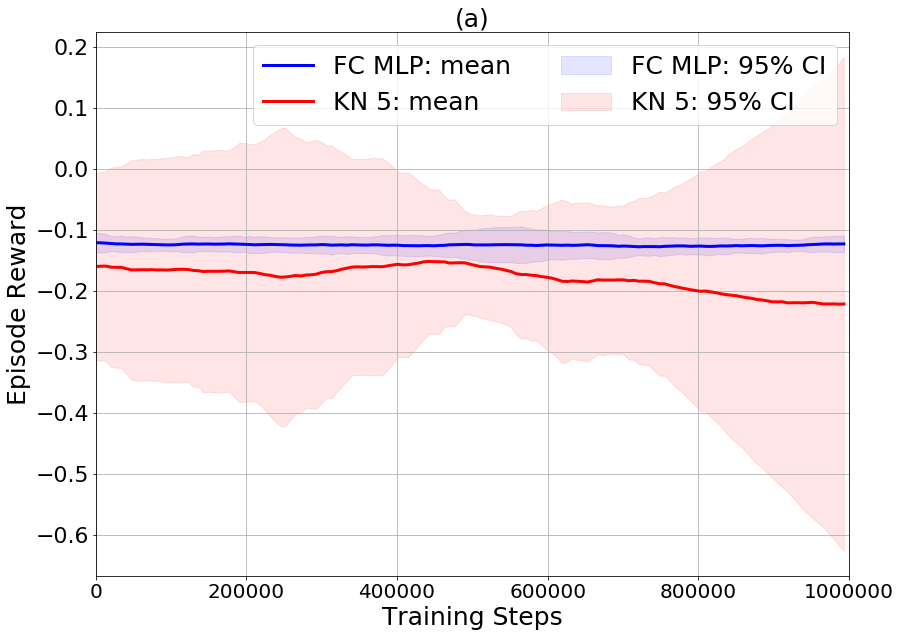

In [104]:
fig = plt.figure(figsize= (13.5, 10))
plt.plot(t,etMe1, linewidth=3, label = "FC MLP: mean", color='blue')
plt.fill_between(t,etLo1, etUp1, color='blue', alpha=0.1, label = "FC MLP: 95% CI")
plt.plot(t,etMe3, linewidth=3, label = "KN 5: mean", color='r')
plt.fill_between(t,etLo3, etUp3, color='r', alpha=0.1, label = "KN 5: 95% CI")
plt.xlim([0, 1000000])
plt.xlabel("Training Steps", fontsize=25)
plt.ylabel("Episode Reward", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.title("(a)", fontsize=25)
plt.legend(ncol=2)
plt.rc('legend',fontsize=25) 
plt.grid()
#plt.ylim([-0.2, 0])
fig.savefig('f1.pdf', dpi=600)
#plt.show()

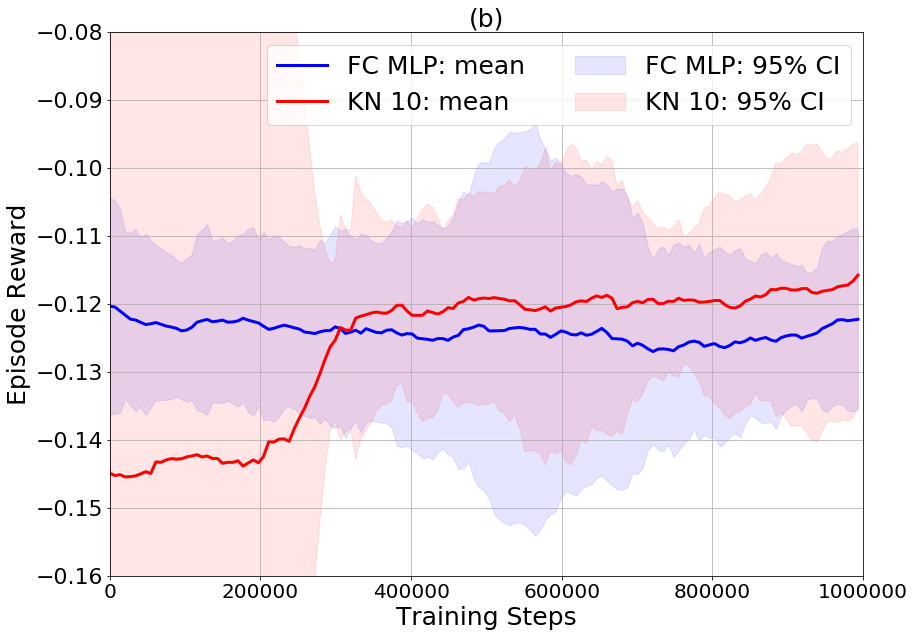

In [105]:
fig = plt.figure(figsize= (13.5, 10))
plt.plot(t,etMe1, linewidth=3, label = "FC MLP: mean", color='blue')
plt.fill_between(t,etLo1, etUp1, color='blue', alpha=0.1, label = "FC MLP: 95% CI")
plt.plot(t,etMe2, linewidth=3, label = "KN 10: mean", color='r')
plt.fill_between(t,etLo2, etUp2, color='r', alpha=0.1, label = "KN 10: 95% CI")
plt.xlim([0, 1000000])
plt.xlabel("Training Steps", fontsize=25)
plt.ylabel("Episode Reward", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.title("(b)", fontsize=25)
plt.legend(ncol=2)
plt.rc('legend',fontsize=25) 
plt.grid()
plt.ylim([-0.16, -0.08])
fig.savefig('f2.pdf', dpi=600)
#plt.show()


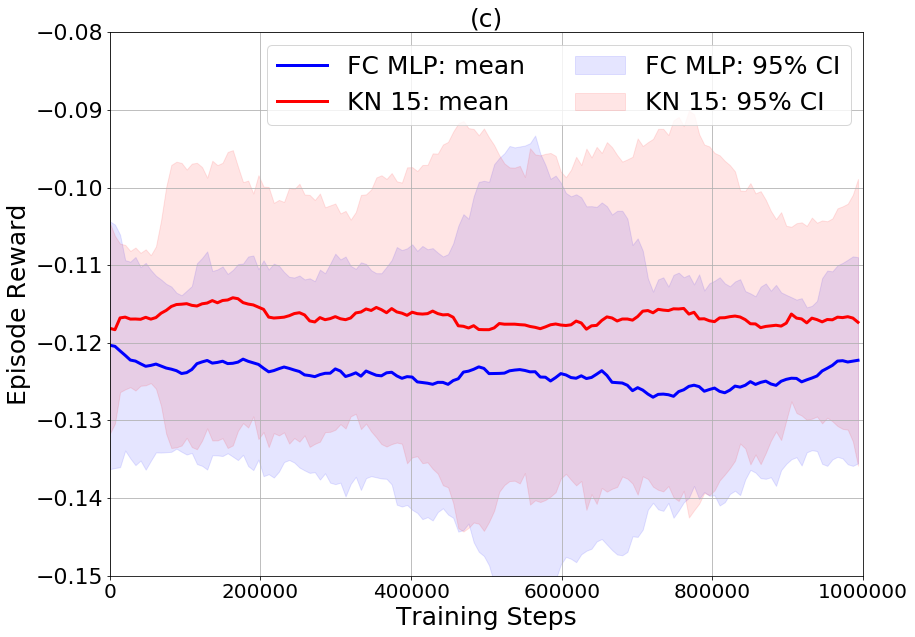

In [106]:
fig = plt.figure(figsize= (13.5, 10))
plt.plot(t,etMe1, linewidth=3, label = "FC MLP: mean", color='blue')
plt.fill_between(t,etLo1, etUp1, color='blue', alpha=0.1, label = "FC MLP: 95% CI")
plt.plot(t,etMe4, linewidth=3, label = "KN 15: mean", color='r')
plt.fill_between(t,etLo4, etUp4, color='r', alpha=0.1, label = "KN 15: 95% CI")
plt.xlim([0, 1000000])
plt.xlabel("Training Steps", fontsize=25)
plt.ylabel("Episode Reward", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.title("(c)", fontsize=25)
plt.legend(ncol=2)
plt.rc('legend',fontsize=25) 
plt.grid()
plt.ylim([-0.15, -0.08])
fig.savefig('f3.pdf', dpi=600)
#plt.show()

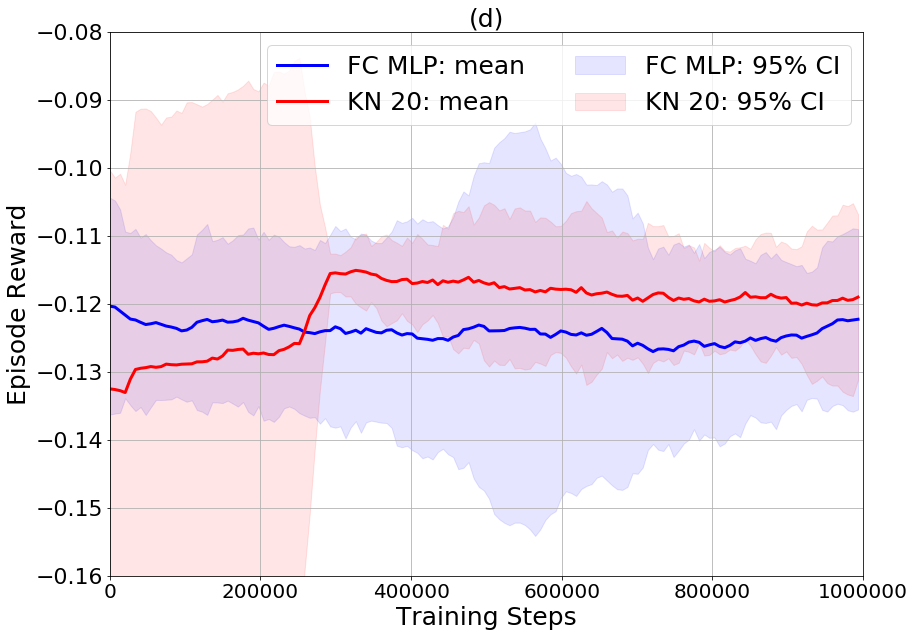

In [107]:
fig = plt.figure(figsize= (13.5, 10))
plt.plot(t,etMe1, linewidth=3, label = "FC MLP: mean", color='blue')
plt.fill_between(t,etLo1, etUp1, color='blue', alpha=0.1, label = "FC MLP: 95% CI")
plt.plot(t,etMe5, linewidth=3, label = "KN 20: mean", color='r')
plt.fill_between(t,etLo5, etUp5, color='r', alpha=0.1, label = "KN 20: 95% CI")
plt.xlim([0, 1000000])
plt.xlabel("Training Steps", fontsize=25)
plt.ylabel("Episode Reward", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.title("(d)", fontsize=25)
plt.legend(ncol=2)
plt.rc('legend',fontsize=25) 
plt.grid()
plt.ylim([-0.16, -0.08])
fig.savefig('f4.pdf', dpi=600)
#plt.show()

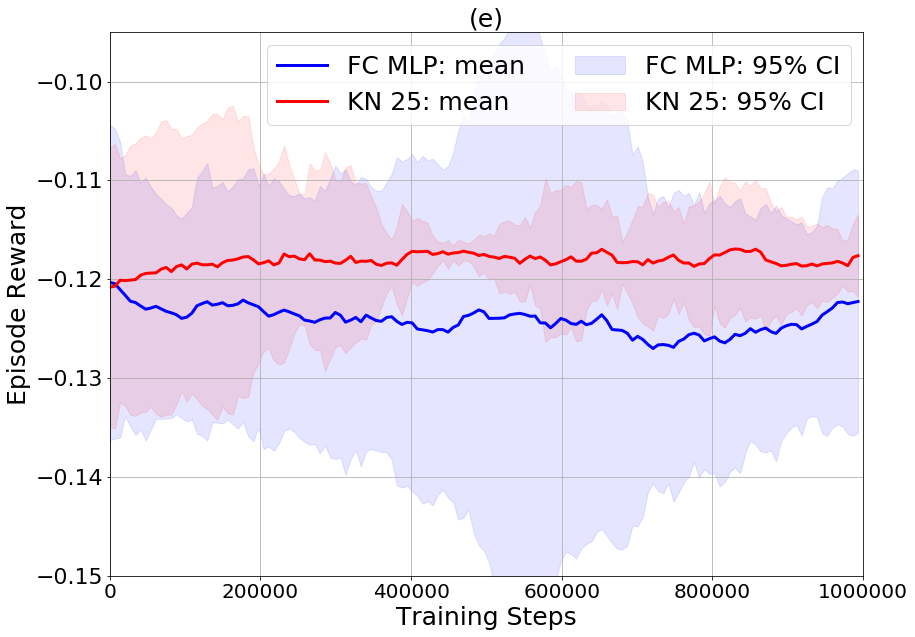

In [108]:
fig = plt.figure(figsize= (13.5, 10))
plt.plot(t,etMe1, linewidth=3, label = "FC MLP: mean", color='blue')
plt.fill_between(t,etLo1, etUp1, color='blue', alpha=0.1, label = "FC MLP: 95% CI")
plt.plot(t,etMe6, linewidth=3, label = "KN 25: mean", color='r')
plt.fill_between(t,etLo6, etUp6, color='r', alpha=0.1, label = "KN 25: 95% CI")
plt.xlim([0, 1000000])
plt.xlabel("Training Steps", fontsize=25)
plt.ylabel("Episode Reward", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.title("(e)", fontsize=25)
plt.legend(ncol=2)
plt.rc('legend',fontsize=25) 
plt.grid()
plt.ylim([-0.15, -0.095])
fig.savefig('f5.pdf', dpi=600)
#plt.show()

In [165]:
t = np.arange(len(evMe)) + Bn
plt.figure(figsize= (7, 9.4))
plt.plot(t, evMe, linewidth=3, label = "Emd-Phy-Sin: mean", color='blue')
plt.fill_between(t, evLo, evUp, color='blue', alpha=0.1, label = "Emd-Phy-Sin: 95% CI")
plt.plot(t, nvMe, linewidth=3, label = "Non-Phy-Sin: mean", color='red')
plt.fill_between(t, nvLo, nvUp, color='red', alpha=0.1, label = "Non-Phy-Sin: 95% CI")
plt.xlim([700000, 1200000])
plt.xlabel("Iterations", fontsize=16)
plt.ylabel("log(validation loss)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("(b)", fontsize=16)
plt.legend()
plt.rc('legend',fontsize=16) 
plt.grid()
plt.ylim([-8.5, -1])
plt.savefig('b.pdf', dpi=0.1)  
plt.show()


NameError: name 'evMe' is not defined

In [ ]:
print(trainloss1)
print(mtrainloss1)

In [2]:
'''
Fun: read the result
'''
def read_result_file(file_name, max_iters, window=10):
    # label_lst = []
    y = []
    x_axis = []
    loss_list = []
    with open(file_name,"r") as f:
        # lines = f.readlines()
        for num, line in enumerate(f):
            loss = line.strip()
            loss_list.append(float(loss))
            # print()
            step = num+1
            if num % window == 1:
                x_axis.append(step)
                loss_avg = np.mean(loss_list)
                y.append(float(loss_avg))
                loss_list = []
            if num > max_iters:
                break
    return y, x_axis


In [4]:
## main function
def main():
    file_names = ['pk.out']
    max_iters = 6004077600
    y_list = []
    for file_name in file_names:
        y,x = read_result_file(file_name, max_iters, window_size)
        print("y-len:", len(y))
        y_list.append(y)

In [5]:
## main function
if __name__ == '__main__':
    main()

NameError: name 'window_size' is not defined

In [35]:
a = np.array([1, 2, 3])

In [37]:
print(a.shape)

(3,)
